In [7]:
import os
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        
import seaborn as sns   
%matplotlib inline     
sns.set(color_codes=True)

In [10]:
def open_file(name):
    script_dir = os.path.dirname(os.path.abspath(name))
    relative_image_path = os.path.join(script_dir, 'data', name)
    return pd.read_csv(relative_image_path, delimiter=",", engine='python', index_col=0)

In [12]:
file = "C:/Users/Lenovo/Downloads/mnist_train1.csv/mnist_train.csv"

#df = pd.read_csv(file,delimiter=",",engine='python',index_col=0)
df = open_file('mnist_train.csv')
df_train = open_file('mnist_test.csv')

index = df.index

In [13]:
df

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
label,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_np = df.to_numpy()
df_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
def show_image(image):
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap = 'gray')
    plt.show()

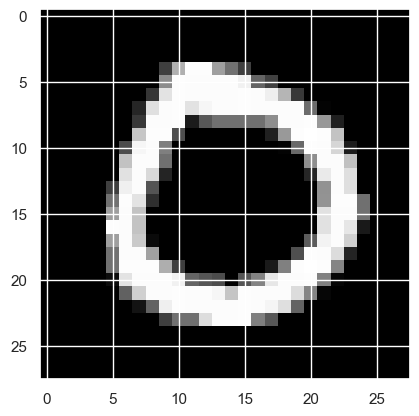

In [16]:
show_image(df_np[209,:])

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df.copy())

In [18]:
np.shape(df_pca)

(60000, 154)

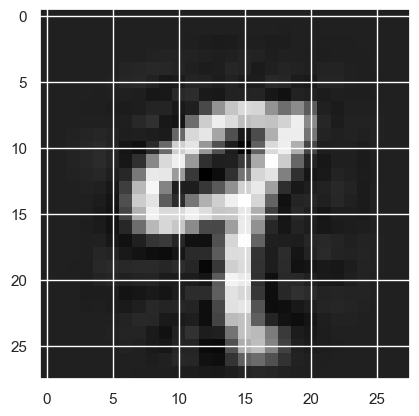

In [19]:
df_recovered = pca.inverse_transform(df_pca)
show_image(df_recovered[4,:])

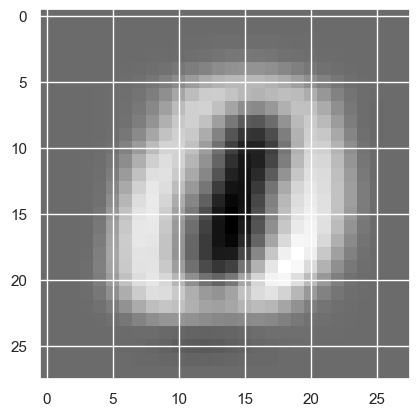

In [20]:
show_image(pca.components_[0])

In [21]:
from sklearn.neighbors import KNeighborsClassifier

X = df_np
y = index

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [23]:
n = 209
neigh.predict(df_np[n:n+1,:])

array([0], dtype=int64)